In [41]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

X0 = data_red.to_numpy() 
X1 = data_white.to_numpy()

N0,D = X0.shape 
N1,D = X1.shape

t0 = np.zeros(N0, dtype = int)
t1 = np.ones(N1, dtype = int)

X = np.vstack((X0, X1))
t = np.hstack((t0, t1)) 

# normalization, 
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

# 이렇게 하면 결과 달라짐
# X = sklearn.preprocessing.normalize(X)   
# N,D = X.shape

X_train,X_test,t_train,t_test = train_test_split(X, t, test_size = 0.20)

print(X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [33]:
print(np.max(X),np.min(X))

1.0 0.0


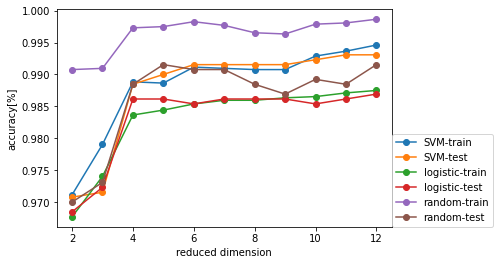

In [42]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy.matlib
import matplotlib.pyplot as plt

C = np.cov(X_train, rowvar = False)

U, s, V = np.linalg.svd(C)
S = np.diag(s)
V = V.T

dimlist = np.arange(2, 13)

accuracy1_train = []
accuracy1_test = []
accuracy2_train = []
accuracy2_test = []
accuracy3_train = []
accuracy3_test = []

for dim_reduction in dimlist:

    Z_train = X_train.dot(U[:,0:dim_reduction])
    Z_test = X_test.dot(U[:,0:dim_reduction])
    
    
    model1 = svm.SVC(kernel = 'rbf')
    model2 = LogisticRegression()
    model3 = RandomForestClassifier(n_estimators = 10, max_depth = 10)
    
    
    model1.fit(Z_train,t_train)
    model2.fit(Z_train,t_train)
    model3.fit(Z_train,t_train)

    y1_train = model1.predict(Z_train)
    y1_test = model1.predict(Z_test)
    y2_train = model2.predict(Z_train)
    y2_test = model2.predict(Z_test)
    y3_train = model3.predict(Z_train)
    y3_test = model3.predict(Z_test)

    
    accuracy1_train.append(accuracy_score(t_train, y1_train))
    accuracy1_test.append(accuracy_score(t_test, y1_test))
    accuracy2_train.append(accuracy_score(t_train, y2_train))
    accuracy2_test.append(accuracy_score(t_test, y2_test))   
    accuracy3_train.append(accuracy_score(t_train, y3_train))
    accuracy3_test.append(accuracy_score(t_test, y3_test))   
 
plt.figure()
# plt.axis([2,12,0.965,1])
plt.xlabel('reduced dimension')
plt.ylabel('accuracy[%]')
plt.plot(dimlist, accuracy1_train, 'o-',label='SVM-train')
plt.plot(dimlist, accuracy1_test, 'o-',label='SVM-test')  
plt.plot(dimlist, accuracy2_train, 'o-',label='logistic-train')
plt.plot(dimlist, accuracy2_test, 'o-',label='logistic-test')
plt.plot(dimlist, accuracy3_train, 'o-',label='random-train')
plt.plot(dimlist, accuracy3_test, 'o-',label='random-test')
plt.legend(loc=(1.0,0))

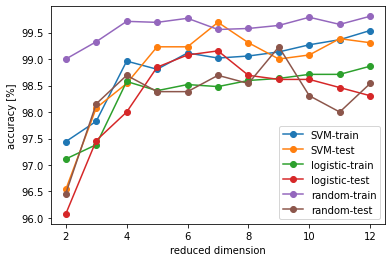

In [40]:
# 교수님 solution
# trainset을 미리 나누지 않고 차원축소 후에 나눔

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C = np.cov(X, rowvar = False)

U,s,V = np.linalg.svd(C)
S = np.diag(s)
V = V.T

svm_train = []
svm_test  = []
log_train = []
log_test  = []
rf_train = []
rf_test = []

for D_reduce in range(2,13):
    X2Z = U[:,:D_reduce]
    Z = X.dot(X2Z)

    model_svm = svm.SVC() # radial basis function
    model_log = LogisticRegression()
    model_rf = RandomForestClassifier(n_estimators = 10, max_depth = 10)

    Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size = 0.20)

    N_train,D_train = Z_train.shape
    N_test,D_test = Z_test.shape

    # 학습
    model_svm.fit(Z_train, t_train)
    model_log.fit(Z_train, t_train)
    model_rf.fit(Z_train, t_train)

    # 예측
    t_svm_train = model_svm.predict(Z_train)
    t_log_train = model_log.predict(Z_train)
    t_rf_train = model_rf.predict(Z_train)
    t_svm_test = model_svm.predict(Z_test)
    t_log_test = model_log.predict(Z_test)
    t_rf_test = model_rf.predict(Z_test)

    # accuracy
    svm_train.append( accuracy_score(t_train, t_svm_train) )
    svm_test.append(  accuracy_score(t_test,  t_svm_test)  )

    log_train.append( accuracy_score(t_train, t_log_train) )
    log_test.append(  accuracy_score(t_test,  t_log_test)  )
    
    rf_train.append( accuracy_score(t_train, t_rf_train) )
    rf_test.append(  accuracy_score(t_test,  t_rf_test)  )
    
plt.figure()
plt.plot(range(2,13), 1e2*np.array([svm_train, svm_test, log_train, log_test, rf_train, rf_test]).T, 'o-')
plt.legend(['SVM-train','SVM-test','logistic-train','logistic-test','random-train','random-test'])
plt.xlabel('reduced dimension')
plt.ylabel('accuracy [%]')
plt.savefig('result.eps')